In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Disc. and prep.

In [ ]:
pip install pm4py

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import pm4py
from scipy.stats.mstats import winsorize

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
log = pm4py.read_xes('/content/drive/MyDrive/BPI Dataset/Road_Traffic_Fine_Management_Process (1).xes')
df = pm4py.convert_to_dataframe(log)
df

# Data preproc

In [ ]:
df

In [ ]:
df['concept:name'].unique()

In [ ]:
df['case:concept:name']

In [ ]:
sum(df['case:concept:name'] == "A1")

In [ ]:
df['notificationType'] = df['notificationType'].replace('NaN',np.nan)
df['notificationType'].unique()

In [ ]:
pd.unique(df['case:concept:name'])

In [ ]:
df['case:concept:name'].describe()

In [ ]:
pd.to_datetime(df['time:timestamp'],utc=True)

In [ ]:
#find missings
mn.matrix(df)

In [ ]:
#Vehicleclass->Create Fine
df_vehicleclass = df[df['concept:name'] == "Create Fine"]
sns.countplot(x ='vehicleClass', data=df_vehicleclass)

In [ ]:
#find dismidal missings
df['dismissal'].unique()
df.dismissal.isnull()
x = df.loc[~df.dismissal.isnull()]
x['concept:name'].unique()
df_dismissal = df[df['concept:name'] == ("Create Fine" or "Send Appeal to Prefecture" or "Appeal to Judge")]
df_dismissal
mn.matrix(df_dismissal)

In [ ]:
#find article missings
df['article'].unique()
df.article.isnull()
x = df.loc[~df.article.isnull()]
x['concept:name'].unique()
dfarticle = df[df['concept:name'] == ("Create Fine")]
mn.matrix(dfarticle)

In [ ]:
def findactivity(k):
  x = df.loc[~df[k].isnull()]
  f = x['concept:name'].unique()
  h = list(map(lambda x:x,f))
  return h
def showactivity(x):
  dfx = df[df['concept:name'] == (x)]
  return mn.matrix(dfx)

In [ ]:
df.head()

In [ ]:
findactivity("amount")

In [ ]:
showactivity('Create Fine'or 'Add penalty')

# Finding Outliers

In [ ]:
findactivity("amount")
sns.boxplot(x="amount",data=df[(df['concept:name'] == ('Create Fine' or 'Add penalty'))])

In [ ]:
#Outer fences of the variable CRIM
def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(df[df['concept:name'] == ('Create Fine' or 'Add penalty')], 'amount')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

In [ ]:
xd = df[df['concept:name'] == ('Create Fine' or 'Add penalty')]

In [ ]:
xd['amount'] = winsorize(xd['amount'].values, limits = [0, 0.09]).data

In [ ]:
sns.boxplot(x='amount',data = xd)

In [ ]:
sns.displot(xd, x="amount",bins = 10)
sns.displot(df, x="amount",bins = 5)

In [ ]:
findactivity("notificationType")
showactivity('Insert Fine Notification')

In [ ]:
findactivity("expense")

In [ ]:
xf = df[df['concept:name'] == ('Send Fine')]
xfa = df[df['concept:name'] == ('Send Fine')]
xfa2 = df[df['concept:name'] == ('Send Fine')]

In [ ]:
fences(xf,'expense')

In [ ]:
#sns.boxplot(x='expense',data = xf)
fences(xf,'expense')
sns.boxplot(x='expense',data = xf[xf['expense']<24.0])

In [ ]:
zzz = df['case:concept:name'].unique()
len(zzz)

In [ ]:
xfa2 = xf[xf['expense']>24]
zz = xfa2['case:concept:name'].unique()
len(zz)

In [ ]:
xfa['expense'] = winsorize(xf['expense'].values, limits = [0, 0.09]).data
sns.boxplot(x='expense',data = xfa)

In [ ]:
findactivity("article")
xa = df[df['concept:name'] == ('Create Fine')]
xa.article = xa.article.astype(str)
uxa =xa.article.unique()
plt.figure(figsize=(50,8))
sns.countplot(x="article",data=xa[xa["article"]!=('7.0' and '157.0' and '158.0')])



# Data dic

In [ ]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
# viz
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.log import case_statistics

In [ ]:
variants = variants_filter.get_variants(log)  
print(f"We have:{len(variants)} variants in our log")

In [ ]:
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
variants_count

In [ ]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
activities
max(activities, key=activities.get)

In [ ]:
activities2 = attributes_filter.get_attribute_values(log, "case:concept:name")
activities2
max(activities2, key=activities2.get)

In [ ]:
sum(activities2.values()) / len(activities2)

3.7339229899581032

# PM TO DM :)

In [ ]:
ca = df['case:concept:name'].unique()
l = {}
for i in ca:
  l[i] = []
  
for i,j in zip(df['case:concept:name'],df['concept:name']):
   l[i].append(j)

In [ ]:
df2 = pd.DataFrame()

In [ ]:
xfg = df['concept:name'].unique()
lam = {}
for i in xfg:
  lam[i] = {}

df4 = pd.DataFrame(lam)

In [ ]:
lfp = {}
for i in df:
  lfp[i] = {}
df5 = pd.DataFrame(lfp)

In [ ]:
df2['caseid'] = df['case:concept:name'].unique()
df3 = pd.concat([df2,df5,df4],axis=1)

In [ ]:
dx_dic = {}
for col in df3.columns:
    dx_dic[col] = df3.columns.get_loc(col)

The code below needs a lot of runtime so we cant easily get what we want from it

In [ ]:
for i in df3['caseid']:
  lis = list(df['concept:name'].unique())
  for j in l[i]:
    v = int(np.where(df3["caseid"] == i)[0])
    b = dx_dic[j]
    df3.iloc[v,b] = 1
    try:
      lis.remove(j)
    except:
      pass
  for j in lis:
    b = dx_dic[j]
    df3.iloc[v,b]  = 0  


so what we do is to split the dataframe into 10 pieces and then compile all of them

In [ ]:
z = [1,2,3,4,5,6,7,8,9,10]
for i in z:
  if i == 1 :
    k = int(df3.shape[0]/10)
    exec(f'dft{i} = df3.iloc[:k,]')
  else:
    k = int(df3.shape[0]/10 * (i-1))
    f = int(df3.shape[0]/10 * i)
    exec(f'dft{i} = df3.iloc[k:f,]')

In [ ]:
dft_samp = []
z = [1,2,3,4,5,6,7,8,9,10]
z_new = [6,7,8,9,10]
for i in z_new: 
  dft_samp.append(f'dft{i}')

In [ ]:
"dft{0}".format(i)

In [ ]:
dx_dic = {}
for col in df3.columns:
    dx_dic[col] = df3.columns.get_loc(col)

In [ ]:
for h in dft_samp :
  i_df = globals()[h]
  for i in i_df['caseid']:
    lis = list(df['concept:name'].unique())
    for j in l[i]:
        v = int(np.where(i_df["caseid"] == i)[0])
        b = dx_dic[j]
        i_df.iloc[v,b] = 1
        try:
          lis.remove(j)
        except:
            pass
    for j in lis:
      b = dx_dic[j]
      i_df.iloc[v,b]  = 0
  i_df.to_csv("/content/drive/MyDrive/BPI Dataset/DFS/"+str(h)+".csv")  

Now we concat them together again.

In [ ]:
dfh_samp = []
for i in z: 
  dfh_samp.append(f'dfh{i}')
for i in z:
  exec(f'dfh{i} = pd.read_csv("/content/drive/MyDrive/BPI Dataset/DFS/dft"+str(i)+".csv")')

In [ ]:
dforg = pd.concat([dfh1,dfh2,dfh3,dfh4,dfh5,dfh6,dfh7,dfh8,dfh9,dfh10])

In [ ]:
dforg.to_csv("/content/drive/MyDrive/BPI Dataset/DFS/dforg.csv")

In [67]:
dforg = pd.read_csv("/content/drive/MyDrive/BPI Dataset/DFS/dforg.csv")
dforg = dforg.set_index('index')

In [ ]:
dforg = dforg.set_index('index')

In [ ]:
dforg["index"] = dforg["Unnamed: 0"]

In [ ]:
dforg = dforg.drop(['Unnamed: 0', 'lifecycle:transition' , 'case:concept:name' , 'amount', 'concept:name'], axis=1)

Now lets go do the logic for the rest of the columns.

In [ ]:
dforg.head()

In [ ]:
dforg.rename(columns = {'time:timestamp' : 'duration(days)'}, inplace = True)

In [ ]:
dic_for_res = {}

for i in ca:
  dic_for_res[i] = []

In [ ]:
from numpy import nan

In [ ]:
for i,j in zip(df['case:concept:name'],df['org:resource']):
  if pd.isnull(j) == False :
    dic_for_res[i].append(j)

In [ ]:
xvb = df['org:resource'].dropna().unique().tolist()

In [ ]:
dx_dic = {}
for col in dforg:
    dx_dic[col] = dforg.columns.get_loc(col)

In [ ]:
dx_dic["org:resource"]

In [ ]:
for i in dforg['caseid']:
  for j in dic_for_res[i]:
    v = int(np.where(dforg["caseid"] == i)[0])
    dforg.iloc[v,1] = j

In [ ]:
dforg

In [ ]:
df['dismissal'].unique()

array(['NIL', nan, '#', 'G', 'N', 'K', '5', '3', 'A', 'I', 'D', 'T', 'E',
       '@', 'M', 'Q', 'F', 'V', 'U', 'C', 'B', '$', 'Z', 'J', 'R', '2',
       '4'], dtype=object)

In [ ]:
dismis_uniq = df['dismissal'].unique()
list(dismis_uniq)

In [ ]:
dismis_uniq = list(dismis_uniq)

In [ ]:
caseunique = list(df['case:concept:name'].unique())

In [ ]:
l = {}
for i,j in zip(df['case:concept:name'],df['dismissal']) :
    if pd.isnull(j) == False :
      l[i] = j

In [ ]:
df[df['dismissal'] == "M"]

In [ ]:
l["N23119"]

In [ ]:
for i in dforg['caseid']:
  v = int(np.where(dforg["caseid"] == i)[0])
  dforg.iloc[v,2] = l[i]

In [ ]:
l = {}
for i,j in zip(df['case:concept:name'],df['totalPaymentAmount']):
  if pd.isnull(j) == False:
    l[i] = j

In [ ]:
for i in dforg['caseid']:
  v = int(np.where(dforg["caseid"] == i)[0])
  dforg.iloc[v,4] = l[i]

In [ ]:
#df[df['vehicleClass'].isnull() == True]
findactivity("vehicleClass")

['Create Fine']

In [ ]:
showactivity("Create Fine")

In [ ]:
l = {}
for i,j in zip(df['case:concept:name'],df['vehicleClass']):
  if pd.isnull(j) == False:
    l[i] = j

In [ ]:
l["A100"]

'A'

In [ ]:
np.unique(list(l.values()))

In [ ]:
for i in caseunique:
  v = int(np.where(dforg["caseid"] == i) [0])
  dforg.iloc[v,3] = l[i]

Now lets get every case duration time so we fill our next column ;)

In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics
median_case_duration = case_statistics.get_median_caseduration(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"
})

In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics
all_case_durations = case_statistics.get_all_casedurations(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"})

In [ ]:
p = []
for i in all_case_durations:
  if i == 0 :
    pass
  else:
    p.append(i)


In [ ]:
import math
all_case_duration_hour = []
for i in all_case_durations:
  min = i/60
  hour = min/60
  day = hour/24
  value = math.ceil(day)
  all_case_duration_hour.append(value)

In [ ]:
case_arrival_ratio = pm4py.get_case_arrival_average(log)

In [ ]:
df

In [ ]:
day_dic = {}
countss = []
caseunique = list(df['case:concept:name'].unique())
for i in caseunique:
  dfk = df[df['case:concept:name'] == i]
  dfk.sort_values(by="time:timestamp")
  row_num = dfk.shape[0]
  duration = dfk.iloc[(row_num - 1),7] - dfk.iloc[0,7]
  durationday = duration.days
  day_dic[i] = durationday
  countss.append(i)

In [ ]:
c = df.iloc[1,7] - df.iloc[0,7]
c.days

In [ ]:
len(day_dic)

In [ ]:
def replaceinnew (y):
  columns = dforg.columns
  l = {}
  for i,j in zip(df['case:concept:name'],df[y]):
    if pd.isnull(j) == False:
      l[i] = j
  for i in l:
    v = int(np.where(dforg["caseid"] == i)[0])
    m = int(columns.get_loc(y))
    dforg.iloc[v,m] = l[i]
  dforg.to_csv("/content/drive/MyDrive/BPI Dataset/DFS/dforg.csv")

In [ ]:
replaceinnew('article')

In [ ]:
replaceinnew('points')

In [ ]:
replaceinnew('notificationType')

In [ ]:
replaceinnew('matricola')

In [ ]:
dforg = dforg.drop(['matricola', 'lastSent' , 'paymentAmount'], axis=1)

In [ ]:
dforg = dforg.drop(['points'], axis=1)

In [ ]:
dforg

In [ ]:
columns = dforg.columns
l = {}
for i,j in zip(df['case:concept:name'],df['expense']):
  if pd.isnull(j) == False:
    l[i] = []
    l[i].append(j)
for i in l:
  v = int(np.where(dforg["caseid"] == i)[0])
  m = int(columns.get_loc('expense'))
  dforg.iloc[v,m] = sum(l[i])
dforg.to_csv("/content/drive/MyDrive/BPI Dataset/DFS/dforg.csv")

In [ ]:
caseunique = list(df['case:concept:name'].unique())

In [ ]:
for i in caseunique:
  v = int(np.where(dforg["caseid"] == i)[0])
  dforg.iloc[v,5] = day_dic[i]

In [ ]:
from pm4py.statistics.traces.generic.log import case_arrival
case_arrival_ratio = case_arrival.get_case_arrival_avg(log, parameters={
    case_arrival.Parameters.TIMESTAMP_KEY: "time:timestamp"})

In [ ]:
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)
## Import the petrinet visualizer object
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

In [ ]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking,variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.view(gviz)

In [ ]:
from pm4py.algo.filtering.log.attributes import attributes_filter

x, y = attributes_filter.get_kde_date_attribute(log, attribute="time:timestamp")

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.DATES)
graphs_visualizer.view(gviz)

In [ ]:
from pm4py.statistics.eventually_follows.log import get as efg_get
efg_graph = efg_get.apply(log)
print(efg_graph)

In [ ]:
df["concept:name"].unique()

In [ ]:
pm4py.view_performance_spectrum(log, ["Create Fine" , "Send Fine" , "Insert Fine Notification", "Send for Credit Collection"], format="png")

# Machine Learning

In [11]:
dforg

,caseid,org:resource,dismissal,vehicleClass,totalPaymentAmount,duration(days),article,expense,notificationType,Create Fine,Send Fine,Insert Fine Notification,Add penalty,Send for Credit Collection,Payment,Insert Date Appeal to Prefecture,Send Appeal to Prefecture,Receive Result Appeal from Prefecture,Notify Result Appeal to Offender,Appeal to Judge
index,,,,,,,,,,,,,,,,,,,,
0,A1,80,19,0,4,134.0,157.0,11.00,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A100,80,19,0,4,971.0,157.0,11.00,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A10000,80,19,0,1,549.0,157.0,13.00,1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,A10001,63,0,0,4,188.0,157.0,13.00,1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,A10004,63,19,0,4,740.0,157.0,13.00,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150365,V9995,20,19,0,4,490.0,142.0,15.16,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
150366,V9996,20,19,0,2,60.0,142.0,10.00,2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
150367,V9997,20,19,2,4,490.0,142.0,15.16,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import seaborn as sns
x = dforg[dforg['totalPaymentAmount']>0]
y = x[x['totalPaymentAmount']<200]
sns.displot(y['totalPaymentAmount'],bins = 3)

In [ ]:
for i,j in zip(dforg['caseid'],dforg['totalPaymentAmount']):
  v = int(np.where(dforg["caseid"] == i)[0])
  if j == 0:
    dforg.iloc[v,4] = "zero"
  elif (j>0 and j<60):
    dforg.iloc[v,4] = "A"
  elif (j>= 60 and j<125):
    dforg.iloc[v,4] = "B"
  elif (j>=125 and j<= 200):
    dforg.iloc[v,4] = "C"
  else:
    dforg.iloc[v,4] = "D"

In [ ]:
dforg[dforg['totalPaymentAmount'] == "D"]

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dforg['vehicleClass'])
list(le.classes_)
dforg['vehicleClass'] = le.transform(dforg['vehicleClass'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(dforg['org:resource'])
list(le.classes_)
dforg['org:resource'] = le.transform(dforg['org:resource'])

In [ ]:
dforg[dforg['totalPaymentAmount'] == "D"]

In [ ]:
list(dforg['org:resource'].unique()).count(99)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(dforg['dismissal'])
list(le.classes_)
dforg['dismissal'] = le.transform(dforg['dismissal'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(dforg['totalPaymentAmount'])
list(le.classes_)
dforg['totalPaymentAmount'] = le.transform(dforg['totalPaymentAmount'])

[0, 1, 2, 3, 4]

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(dforg['notificationType'])
list(le.classes_)
dforg['notificationType'] = le.transform(dforg['notificationType'])

In [ ]:
[dforg.corr()['totalPaymentAmount']]

[org:resource                            -0.047544
 dismissal                               -0.111357
 vehicleClass                             0.044099
 totalPaymentAmount                       1.000000
 duration(days)                           0.612047
 article                                  0.050984
 expense                                  0.015984
 notificationType                        -0.518731
 Create Fine                                   NaN
 Send Fine                                0.777842
 Insert Fine Notification                 0.521406
 Add penalty                              0.521406
 Send for Credit Collection               0.674065
 Payment                                 -0.978405
 Insert Date Appeal to Prefecture         0.121484
 Send Appeal to Prefecture                0.122539
 Receive Result Appeal from Prefecture    0.019189
 Notify Result Appeal to Offender         0.017452
 Appeal to Judge                          0.017956
 Name: totalPaymentAmount, dtyp

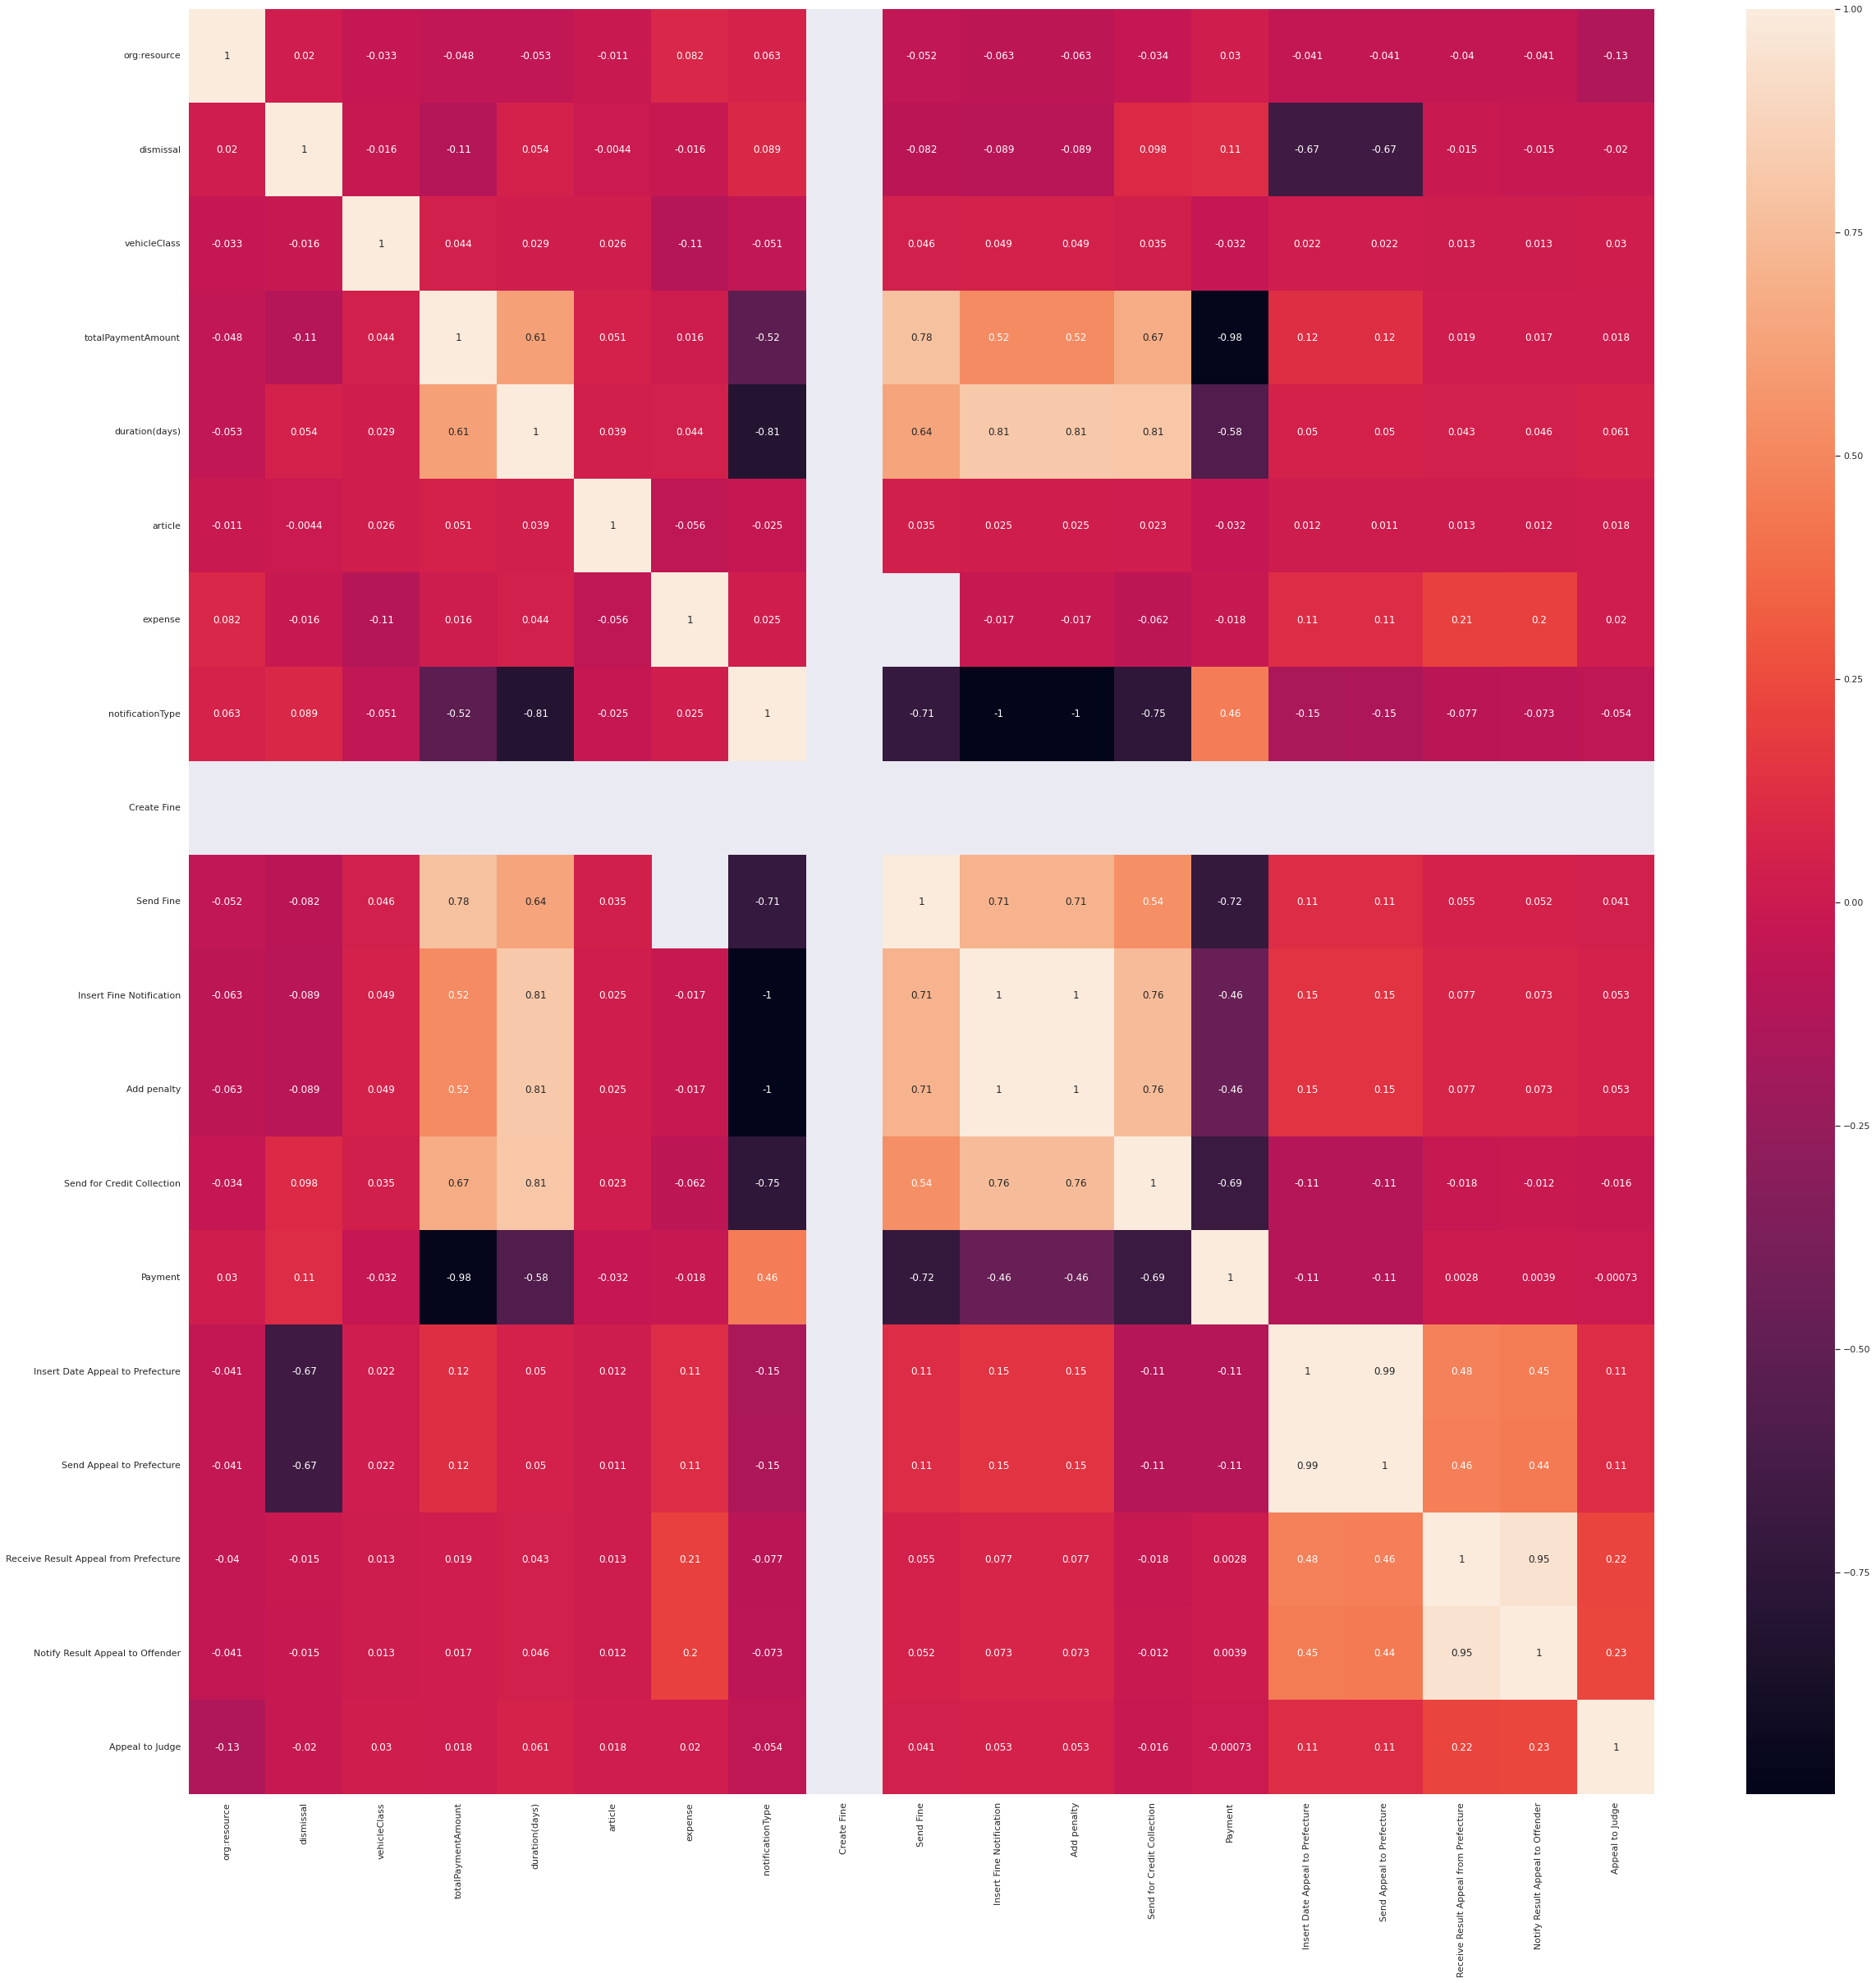

In [ ]:
corrmatrix = dforg.corr()
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corrmatrix, annot=True)

In [13]:
dforg.columns

Index(['caseid', 'org:resource', 'dismissal', 'vehicleClass',
       'totalPaymentAmount', 'duration(days)', 'article', 'expense',
       'notificationType', 'Create Fine', 'Send Fine',
       'Insert Fine Notification', 'Add penalty', 'Send for Credit Collection',
       'Payment', 'Insert Date Appeal to Prefecture',
       'Send Appeal to Prefecture', 'Receive Result Appeal from Prefecture',
       'Notify Result Appeal to Offender', 'Appeal to Judge'],
      dtype='object')

In [102]:
features = ['org:resource' , 'dismissal' , 'vehicleClass' , 'duration(days)' , 'article', 'expense',
       'notificationType', 'Create Fine', 'Send Fine',
       'Insert Fine Notification', 'Add penalty', 'Send for Credit Collection',
       'Payment', 'Insert Date Appeal to Prefecture',
       'Send Appeal to Prefecture', 'Receive Result Appeal from Prefecture',
       'Notify Result Appeal to Offender', 'Appeal to Judge']
X = dforg.loc[:, features]
y = dforg.loc[:, ['totalPaymentAmount']]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = .75)

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
from sklearn import tree

In [69]:
dforg['expense'].median()

11.88

In [99]:
dforg['expense'].fillna(dforg['expense'].median() , inplace = True)

In [100]:
dforg['expense'].unique()

array([11.  , 13.  , 11.88, 18.6 , 16.6 , 22.  , 24.2 , 26.  , 13.5 ,
       19.1 , 24.7 ,  5.6 ,  0.  , 16.9 , 23.5 , 11.41,  6.71,  6.46,
       10.  ,  4.96, 15.16, 11.62, 12.91, 16.37, 21.95, 17.04, 11.87,
       22.2 , 13.43, 17.03, 20.32, 16.  , 15.6 , 14.25, 19.85, 15.  ,
        5.88, 35.  , 25.  , 21.6 , 30.  , 32.  , 31.  , 16.58, 16.78,
       26.49, 21.74, 21.33, 21.54, 22.21, 20.14, 25.31, 25.3 , 20.19,
       13.25, 20.76, 25.48, 21.16, 33.4 , 27.8 , 25.45, 23.1 , 28.7 ,
       24.78, 60.  , 45.  , 46.  , 16.25, 27.  , 29.8 , 16.3 , 29.1 ,
       30.3 , 33.5 , 40.  , 76.  , 20.88, 36.88, 75.  , 33.6 , 35.88,
       50.88, 19.3 , 26.29, 26.91, 26.7 , 28.  , 27.11, 25.92, 26.36,
       11.6 ])

In [ ]:
dforg['expense'] = dforg['expense'].astype(float)

In [ ]:
dforg.dtypes

In [79]:
dforg.isna().any()

caseid                                   False
org:resource                             False
dismissal                                False
vehicleClass                             False
totalPaymentAmount                       False
duration(days)                           False
article                                  False
expense                                  False
notificationType                         False
Create Fine                              False
Send Fine                                False
Insert Fine Notification                 False
Add penalty                              False
Send for Credit Collection               False
Payment                                  False
Insert Date Appeal to Prefecture         False
Send Appeal to Prefecture                False
Receive Result Appeal from Prefecture    False
Notify Result Appeal to Offender         False
Appeal to Judge                          False
dtype: bool

In [ ]:
dforg.dtypes

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)
X_test = X_test.astype(float)
y_test = y_test.astype(float)

In [98]:
X_train.dtypes

org:resource                               int64
dismissal                                  int64
vehicleClass                               int64
duration(days)                           float64
article                                  float64
expense                                   object
notificationType                           int64
Create Fine                              float64
Send Fine                                float64
Insert Fine Notification                 float64
Add penalty                              float64
Send for Credit Collection               float64
Payment                                  float64
Insert Date Appeal to Prefecture         float64
Send Appeal to Prefecture                float64
Receive Result Appeal from Prefecture    float64
Notify Result Appeal to Offender         float64
Appeal to Judge                          float64
dtype: object

In [116]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train,y_train)
clf = DecisionTreeClassifier( max_depth=3, random_state=0)

In [105]:
y_pred_gini = clf_gini.predict(X_test)

In [117]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [107]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9269


In [108]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 4, 4, ..., 1, 0, 4])

In [109]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9289
Test set score: 0.9269


Very Good Model !!!!

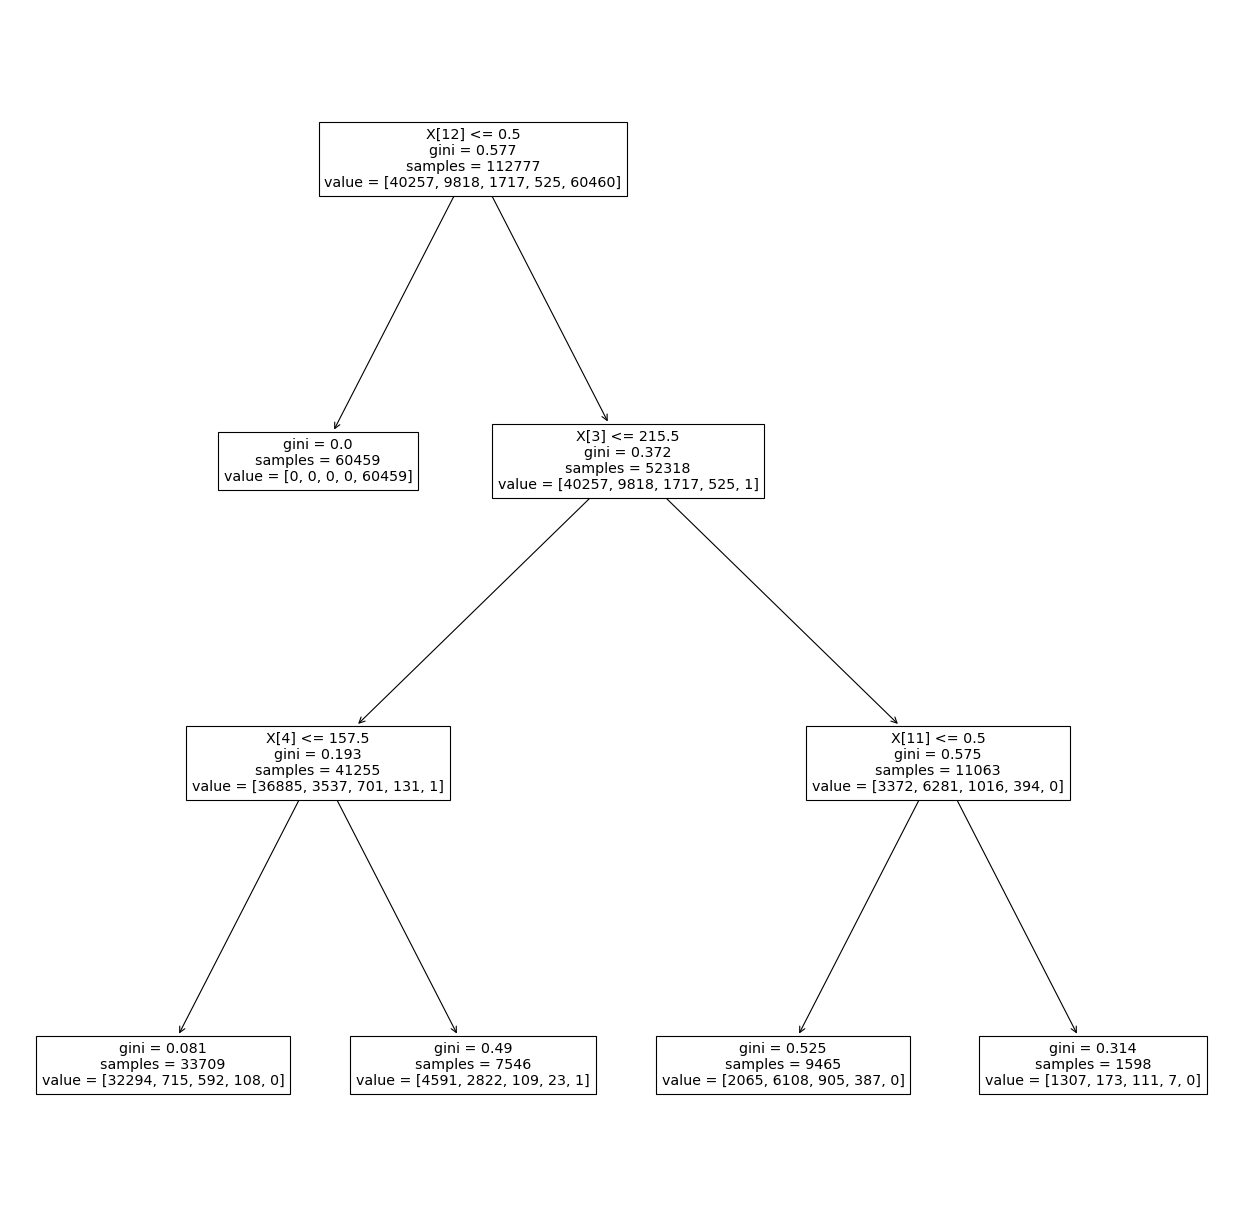

In [118]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20), dpi=80)
tree.plot_tree(clf)
plt.show()